## Hypothesis 4 testing

### Do accidents increase during cold weather?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
melb_merged = pd.read_csv('cleaned_data/merged_melb_data.csv')
melb_merged.head()

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,13.3
1,T20140013680,Driving accident,Finished,2014/07/03,11:00:00,No,No collision and no object struck,Thursday,OFF CARRIAGEWAY TO RIGHT,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,13.1
2,T20140013898,Driving accident,Finished,2014/07/03,10:30:00,No,Fall from or in moving vehicle,Thursday,FELL IN/FROM VEHICLE,No,...,0.0,1.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,13.1
3,T20140013771,Driving accident,Finished,2014/07/04,17:40:00,No,No collision and no object struck,Thursday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Local Road,Metro,0.0,12.8
4,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,12.8


In [3]:
#Remove accidents happened due to death of the driver before the accident
melb_merged = melb_merged[melb_merged['ABS_CODE']=='Driving accident']
melb_merged.shape

(3887, 54)

## Study accidents in both all roads and fast roads

### (a) Road accident frequency in all kinds of roads against daily max temperature

In [4]:
# Group data by the accident date to find daily values.
grouped_df = melb_merged.groupby(["Date"])

# Assign data to axis: x_axis is max temperature (mean used but all max temperature data values are the same for the same date),
# y_axis is daily accident count  
x_a = grouped_df["Maximum temperature (Degree C)"].mean()
y_a = grouped_df["ACCIDENT_NO"].count()

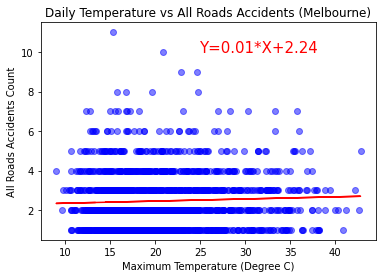

The pvalue of this correlation is 0.061 ---> We cannot reject null hypothesis


In [10]:
# Use matplotlib to create a scatter plot
plt.scatter(x_a, y_a, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.title("Daily Temperature vs All Roads Accidents (Melbourne)")
plt.xlabel("Maximum Temperature (Degree C)")
plt.ylabel("All Roads Accidents Count")

#Create regression line for the data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(x_a,y_a)
all_regress_values = x_a*slope+intercept
plt.plot(x_a,all_regress_values,color='r')
line_eq = 'Y='+str(round(slope,2))+'*X+'+str(round(intercept,2))
plt.annotate(line_eq,(25,10),fontsize=15,color='red')
plt.show()
print('The pvalue of this correlation is '+str(round(pvalue,3))+' ---> We cannot reject null hypothesis')

### (b) Fast roads accidents against daily max temperature

In [6]:
melb_merged['RMA'].unique()

array(['Freeway', 'Local Road', 'Arterial Other', 'Arterial Highway'],
      dtype=object)

In [7]:
#Separate data for accidents happened on freeways only
melb_fast = melb_merged[(melb_merged['RMA']=='Arterial Highway') | (melb_merged['RMA']=='Freeway')
                         | (melb_merged['RMA']=='Arterial Other')]
melb_fast

,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,Date,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,STAT_DIV_NAME,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.4,13.3
4,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,Thursday,RIGHT THROUGH,No,...,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.0,12.8
6,T20140013781,Driving accident,Finished,2014/07/04,18:45:00,Yes,Collision with vehicle,Friday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.0,12.8
9,T20140013895,Driving accident,Finished,2014/07/06,11:38:00,No,Collision with vehicle,Sunday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.2,13.8
12,T20140014421,Driving accident,Finished,2014/07/12,12:59:00,No,Collision with vehicle,Saturday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,4.4,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,T20180011149,Driving accident,Finished,2018/06/12,09:30:00,No,Collision with vehicle,Monday,RIGHT TURN SIDESWIPE,No,...,0.0,1.0,MELB_URBAN,MELB_URBAN,"MELBOURNE,YARRA",METROPOLITAN NORTH WEST REGION,Arterial Other,Metro,0.4,16.6
3876,T20180012710,Driving accident,Finished,2018/07/06,21:25:00,Yes,Collision with vehicle,Friday,RIGHT THROUGH,Yes,...,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Freeway,Metro,0.0,15.2
3877,T20180015801,Driving accident,Finished,2018/08/21,08:05:00,No,Collision with vehicle,Tuesday,REAR END(VEHICLES IN SAME LANE),No,...,0.0,0.0,MELBOURNE_CBD,"MELB_URBAN,MELBOURNE_CBD",MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Highway,Metro,1.2,12.4
3881,T20180018480,Driving accident,Finished,2018/10/01,20:45:00,Yes,Collision with vehicle,Monday,RIGHT THROUGH,Not known,...,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Arterial Highway,Metro,0.0,23.3


In [8]:
# Group data by the accident date to find daily values.
grouped_fast = melb_fast.groupby(["Date"])

# Assign data to axis: x_axis is max temperature (mean used but all max temperature data values are the same for the same date),
# y_axis is daily accident count  
x_f = grouped_fast["Maximum temperature (Degree C)"].mean()
y_f = grouped_fast["ACCIDENT_NO"].count()

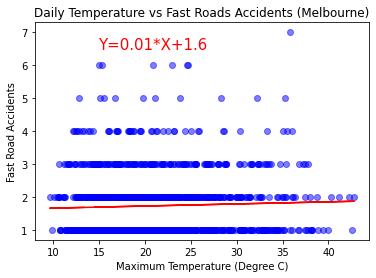

The pvalue of this correlation is 0.125 ---> We cannot reject null hypothesis


In [11]:
# Use matplotlib to create a scatter plot
plt.scatter(x_f, y_f, marker="o", facecolors="blue", edgecolors="blue", alpha=0.5)
plt.title("Daily Temperature vs Fast Roads Accidents (Melbourne)")
plt.xlabel("Maximum Temperature (Degree C)")
plt.ylabel("Fast Road Accidents")

#Create regression line for the data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(x_f,y_f)
fast_regress_values = x_f*slope+intercept
plt.plot(x_f,fast_regress_values,color='r')
line_eq = 'Y='+str(round(slope,2))+'*X+'+str(round(intercept,2))
plt.annotate(line_eq,(15,6.5),fontsize=15,color='red')
plt.show()
print('The pvalue of this correlation is '+str(round(pvalue,3))+' ---> We cannot reject null hypothesis')
